# **Implimantation Of Code**   

---

## **Diabetic Prediction Using Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project_Work_@NISTU/diabetes_prediction_dataset.csv')

In [ ]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
data.shape

(100000, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex'] =le.fit_transform(data['gender'])
data['Smoking_history'] =le.fit_transform(data['smoking_history'])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,sex,Smoking_history
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,4
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,1,4
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,1
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0,0,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,0,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0,1,3
99998,Female,24.0,0,0,never,35.42,4.0,100,0,0,4


In [ ]:
data = data.drop(['gender','smoking_history'],axis=1)
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,sex,Smoking_history
0,80.0,0,1,25.19,6.6,140,0,0,4
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,4
3,36.0,0,0,23.45,5.0,155,0,0,1
4,76.0,1,1,20.14,4.8,155,0,1,1
...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,3
99998,24.0,0,0,35.42,4.0,100,0,0,4


In [ ]:
y=data['diabetes']
x=data.drop(['diabetes'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=5)

In [ ]:
pd.DataFrame(ytrain).value_counts()

,count
diabetes,
0,73122
1,6878


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred = model.predict(xtest)
ypred = (ypred >= 0.5).astype(int)

In [ ]:
ytest

,diabetes
60743,0
33949,1
52805,0
11804,0
9229,0
...,...
10263,0
85435,0
26023,0
18898,0


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
lr_ac = accuracy_score(ytest,ypred)
lr_ac

0.9593

In [ ]:
cm = confusion_matrix(ytest,ypred)
cm

array([[18186,   192],
       [  622,  1000]])

Text(0.5, 25.722222222222214, 'Truth')

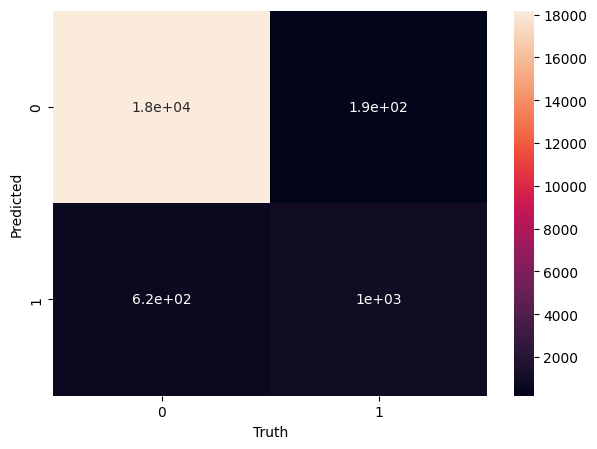

In [ ]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.ylabel('Predicted')
plt.xlabel('Truth')

# **Diabetic Prediction using SVM**

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [ ]:
full_dataset = xtest + xtrain

In [ ]:
ypred = model.predict(x)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ytest.values

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
svm_ac=accuracy_score(y,ypred)
svm_ac

0.96014

In [ ]:
cm = confusion_matrix(y,ypred)
cm

array([[90870,   630],
       [ 3356,  5144]])

Text(0.5, 25.722222222222214, 'Truth')

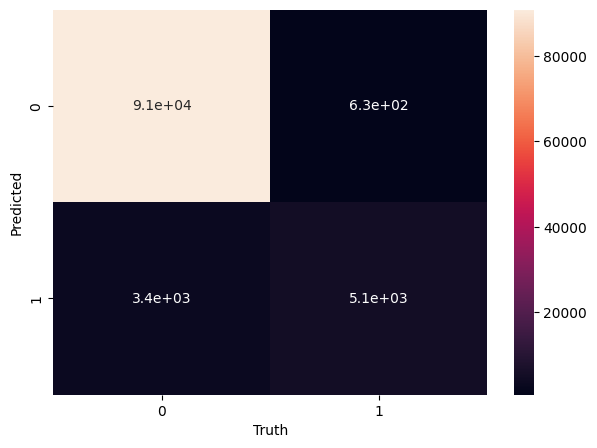

In [ ]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.ylabel('Predicted')
plt.xlabel('Truth')

## **Comparision Of Accuracy of both the Algorithm**

In [ ]:
print("Logistic Regression Accuracy:", lr_ac)
print("SVM Accuracy:", svm_ac)

if svm_ac > lr_ac:
    print("✅ SVM performs better than Logistic Regression.")
else:
    print("✅ Logistic Regression performs better than SVM.")


Logistic Regression Accuracy: 0.9593
SVM Accuracy: 0.96014
✅ SVM performs better than Logistic Regression.
